# Preprocessing with Bounding Boxes

In [1]:
import pandas as pd
import pathlib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#import utilities
import sys
sys.path.append('src/')
import utils as utils
from preprocessing3 import *
#from preprocessing2 import *

#import tensorflow as t
#from tensorflow import keras

#from comet_ml import Experiment

In [2]:
# import random

In [3]:
'''
import albumentations as A
from albumentations.pytorch import ToTensor

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms.functional as TF
from torch import nn
import torch.nn.functional as F
from torch.utils.data import SubsetRandomSampler
from torch.utils.data.sampler import SequentialSampler, RandomSampler
from torch.optim import Adam,lr_scheduler

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

from tqdm import tqdm_notebook, tqdm
'''

'\nimport albumentations as A\nfrom albumentations.pytorch import ToTensor\n\nimport torch\nfrom torch.utils.data import Dataset, DataLoader\nimport torchvision\nimport torchvision.transforms.functional as TF\nfrom torch import nn\nimport torch.nn.functional as F\nfrom torch.utils.data import SubsetRandomSampler\nfrom torch.utils.data.sampler import SequentialSampler, RandomSampler\nfrom torch.optim import Adam,lr_scheduler\n\nfrom torchvision.models.detection.faster_rcnn import FastRCNNPredictor\n\nfrom tqdm import tqdm_notebook, tqdm\n'

In [4]:
# define training and save paths and read in training csv and label key
data_dir = pathlib.Path('gwhd_2021/images/')
images = list(data_dir.glob('*.jpg'))

In [5]:
# images

In [6]:
# Import data
metadata = pd.read_csv('gwhd_2021/metadata_dataset.csv', sep=';')
train = pd.read_csv('gwhd_2021/competition_train.csv')
# Update metadata['name'] to metadata['domain'] to match full column name
metadata.rename(columns = {"name": "domain"}, inplace=True)

In [7]:
# Merge dfs and preprocess
train_df = train.merge(metadata, on='domain')

In [8]:
test = pd.read_csv('gwhd_2021/competition_test.csv')

In [9]:
test_df = test.merge(metadata, on='domain')

In [10]:
train_df = utils.preprocess_df(train_df)

In [11]:
train_df.head()

,image_name,BoxesString,domain,country,location,development_stage,bbox_xmin,bbox_ymin,bbox_xmax,bbox_ymax,bbox_width,bbox_height
0,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,"[99, 692, 160, 764]",Arvalis_1,France,Gréoux,Post-flowering,99.0,692.0,160.0,764.0,61.0,72.0
1,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,"[641, 27, 697, 115]",Arvalis_1,France,Gréoux,Post-flowering,641.0,27.0,697.0,115.0,56.0,88.0
2,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,"[935, 978, 1012, 1020]",Arvalis_1,France,Gréoux,Post-flowering,935.0,978.0,1012.0,1020.0,77.0,42.0
3,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,"[377, 834, 463, 890]",Arvalis_1,France,Gréoux,Post-flowering,377.0,834.0,463.0,890.0,86.0,56.0
4,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,"[654, 797, 696, 837]",Arvalis_1,France,Gréoux,Post-flowering,654.0,797.0,696.0,837.0,42.0,40.0


In [12]:
test_df = utils.preprocess_df(test_df)

In [13]:
test_df.head()

,image_name,BoxesString,domain,country,location,development_stage,bbox_xmin,bbox_ymin,bbox_xmax,bbox_ymax,bbox_width,bbox_height
0,255b6ca9fea63f44125e5174bc932470b604c760430715...,"[481, 820, 604, 922]",UQ_7,Australia,Gatton,Ripening,481.0,820.0,604.0,922.0,123.0,102.0
1,255b6ca9fea63f44125e5174bc932470b604c760430715...,"[655, 957, 732, 1024]",UQ_7,Australia,Gatton,Ripening,655.0,957.0,732.0,1024.0,77.0,67.0
2,255b6ca9fea63f44125e5174bc932470b604c760430715...,"[930, 926, 1013, 1024]",UQ_7,Australia,Gatton,Ripening,930.0,926.0,1013.0,1024.0,83.0,98.0
3,255b6ca9fea63f44125e5174bc932470b604c760430715...,"[809, 851, 910, 924]",UQ_7,Australia,Gatton,Ripening,809.0,851.0,910.0,924.0,101.0,73.0
4,255b6ca9fea63f44125e5174bc932470b604c760430715...,"[836, 904, 866, 967]",UQ_7,Australia,Gatton,Ripening,836.0,904.0,866.0,967.0,30.0,63.0


First off, let's address the class imbalances of development stage. 

## Balancing class distribution

In [14]:
#utils.set_plot(16)
#train_df.groupby('development_stage').count().plot.barh(title='Training Images - Class Counts', 
                                                        #legend=False, color='royalblue', 
                                                        #xlabel="Development stage")
#plt.show()

In [15]:
## To use the balanced_df function, we will need a numeric label representation
#label_dict = {'Ripening': 0, 'Post-flowering': 1, 'Filling - Ripening': 2, 'Filling': 3}

#train_df['label'] = train_df['development_stage'].copy()
#train_df['label'].replace(label_dict, inplace=True)

In [16]:
#balanced_df = utils.balance_df(train_df, class_size=10000)

In [17]:
#balanced_df.groupby('development_stage').count().plot.barh(title='Training Images - Class Counts', 
                                                        #legend=False, color='royalblue', 
                                                        #xlabel="Development stage")
#plt.show()

# Test-Time Augmentation
~~Although the augmentations completed in the previous notebook looked great, the process of creating those augmented images (with the albumentations library) is just too computationally expensive to be a viable option for an image dataset of this size. As a more cost-efficient alternative, we will instead use Time-Test Augmentation (TTA) to employ simple, real-time augmentions at the time of modeling using the `ImageDataGenerator` class from Keras. ~~

In [18]:
'''
# make a prediction using test-time augmentation
def tta_prediction(datagen, model, image, n_examples):
    # convert image into dataset
    samples = expand_dims(image, 0)
    # prepare iterator
    it = datagen.flow(samples, batch_size=n_examples)
    # make predictions for each augmented image
    yhats = model.predict_generator(it, steps=n_examples, verbose=0)
    # sum across predictions
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    return argmax(summed)
'''

'\n# make a prediction using test-time augmentation\ndef tta_prediction(datagen, model, image, n_examples):\n    # convert image into dataset\n    samples = expand_dims(image, 0)\n    # prepare iterator\n    it = datagen.flow(samples, batch_size=n_examples)\n    # make predictions for each augmented image\n    yhats = model.predict_generator(it, steps=n_examples, verbose=0)\n    # sum across predictions\n    summed = numpy.sum(yhats, axis=0)\n    # argmax across classes\n    return argmax(summed)\n'

In [19]:
from preprocessing3 import *

In [20]:
train_image_ids = train_df.image_name.unique()
test_image_ids = test_df.image_name.unique()

In [21]:
train_dataset = WheatDataset(
    image_ids=train_image_ids,
    labels_df= train_df,
    transforms=get_train_transforms(),
    test=False
)

validation_dataset = WheatDataset(
    image_ids=test_image_ids,
    labels_df=test_df,
    transforms=get_valid_transforms(),
    test=True
)

In [22]:
# Syntax:
# cv2.rectangle(image, start_point, end_point, color, thickness)

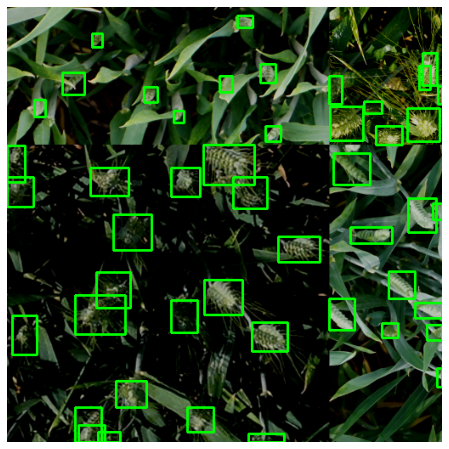

In [23]:
image, target, image_id = train_dataset[1]
boxes = target['boxes'].cpu().numpy().astype(np.int32)

numpy_image = image.permute(1,2,0).cpu().numpy()

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
    #cv2.rectangle(numpy_image, (box[0], box[1]), (box[2],  box[3]), (0, 1, 0), 2)
    cv2.rectangle(numpy_image, (box[1], box[0]), (box[3],  box[2]), (0, 1, 0), 2)
    
ax.set_axis_off()
ax.imshow(numpy_image)